## age and gender detection model

### In this model, we will be performing both classification and regression to predict human gender and age respectively.

In [ ]:
# Import necessary modules first.
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def convert_to_grayscale(input_path, output_path):
    # Open the image file
    image = Image.open(input_path)

    # Convert the image to grayscale
    grayscale_image = image.convert('L')

    # Save the grayscale image
    grayscale_image.save(output_path)

In [ ]:
from PIL import Image

# Example usage
input_image_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/testing.jpg'
output_image_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/grayscale_image.jpg'

convert_to_grayscale(input_image_path, output_image_path)


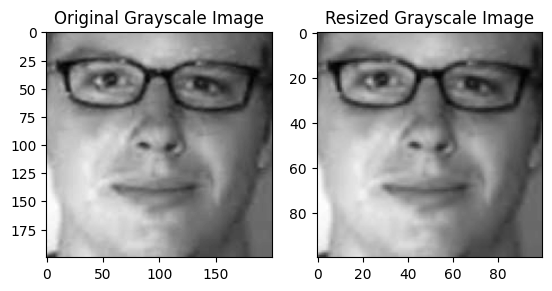

In [15]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale and resize it
img_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/grayscale_image.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (100, 100))

# Plot the original and resized images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(img_resized, cmap='gray')
plt.title('Resized Grayscale Image')

plt.show()

ValueError: ignored

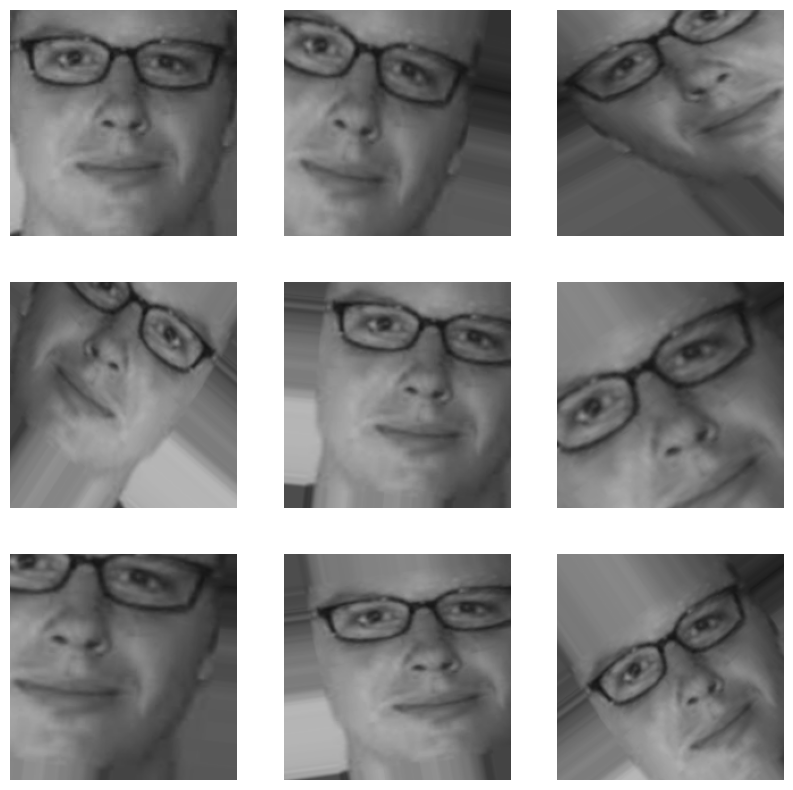

In [16]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is not None:
    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape the image to (height, width, channels)
    img = img.reshape(img.shape[0], img.shape[1], img.shape[2])

    # Reshape the image to (1, height, width, channels) for the data generator
    img = img.reshape((1,) + img.shape)

    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate augmented images
    augmented_images = []

    # Generate 9 augmented images for visualization
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        if len(augmented_images) == 9:
            break

    # Plot the original and augmented images
    plt.figure(figsize=(10, 10))
    for i, image in enumerate([img[0]] + augmented_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')

    plt.show()
else:
    print(f"Failed to load the image from {img_path}. Please check the file path.")


In [ ]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/UTKFace.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
BASE_DIR = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)
for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [ ]:
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels


In [ ]:
display(df)

,image_path,age,gender
0,/content/UTKFace/38_0_1_20170117135753077.jpg....,38,male
1,/content/UTKFace/21_0_1_20170117195323136.jpg....,21,male
2,/content/UTKFace/26_1_3_20170104232420017.jpg....,26,female
3,/content/UTKFace/27_0_3_20170119193230738.jpg....,27,male
4,/content/UTKFace/45_0_0_20170117183156790.jpg....,45,male
...,...,...,...
23703,/content/UTKFace/56_0_0_20170111171747473.jpg....,56,male
23704,/content/UTKFace/24_0_0_20170116213539070.jpg....,24,male
23705,/content/UTKFace/1_1_2_20161219205649948.jpg.c...,1,female
23706,/content/UTKFace/50_0_0_20170120221409269.jpg....,50,male


In [ ]:
df['gender'] = df['gender'].map({0: 'male', 1: 'female'})

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into df with 'image_path', 'age', and 'gender' columns

# Split the data into training and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Use ImageNet preprocessing
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# Define batch size
batch_size = 16

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='gender',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification for gender
    shuffle=True
)

valid_generator = datagen.flow_from_dataframe(
    valid_df,
    x_col='image_path',
    y_col='gender',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Use a pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for gender prediction
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary gender prediction

# Create the gender prediction model
gender_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





Found 18966 validated image filenames belonging to 2 classes.
Found 4742 validated image filenames belonging to 2 classes.


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into df with 'image_path', 'age', and 'gender' columns

# Split the data into training and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Use ImageNet preprocessing
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

# Define batch size
batch_size = 16

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='gender',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Categorical classification for gender
    shuffle=True
)

valid_generator = datagen.flow_from_dataframe(
    valid_df,
    x_col='image_path',
    y_col='gender',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Use a pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for gender prediction
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # Output layer for categorical gender prediction

# Create the gender prediction model
gender_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
gender_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 18966 validated image filenames belonging to 2 classes.
Found 4742 validated image filenames belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Train the model
history = gender_model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10
 402/1186 [=========>....................] - ETA: 2:19:17 - loss: 0.6370 - accuracy: 0.6722

In [ ]:
gender_model.save('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/gender_prediction_model_v3.h5')

In [ ]:
age_model.save('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/age_prediction_model_v2.h5')

In [ ]:
history_gender = gender_model.fit(train_gender_generator, validation_data=valid_gender_generator, epochs=10)

Epoch 1/10
1186/1186 [==============================] - 286s 204ms/step - loss: 0.5206 - accuracy: 0.7488 - val_loss: 0.4831 - val_accuracy: 0.8313
Epoch 2/10
1186/1186 [==============================] - 246s 208ms/step - loss: 0.3420 - accuracy: 0.8579 - val_loss: 0.3535 - val_accuracy: 0.8564
Epoch 3/10
1186/1186 [==============================] - 249s 210ms/step - loss: 0.2966 - accuracy: 0.8754 - val_loss: 0.2877 - val_accuracy: 0.8876
Epoch 4/10
1186/1186 [==============================] - 246s 207ms/step - loss: 0.2634 - accuracy: 0.8913 - val_loss: 0.4960 - val_accuracy: 0.7853
Epoch 5/10
1186/1186 [==============================] - 249s 210ms/step - loss: 0.2436 - accuracy: 0.8986 - val_loss: 0.5801 - val_accuracy: 0.7849
Epoch 6/10
1186/1186 [==============================] - 246s 207ms/step - loss: 0.2193 - accuracy: 0.9104 - val_loss: 0.3234 - val_accuracy: 0.8787
Epoch 7/10
1186/1186 [==============================] - 246s 207ms/step - loss: 0.2088 - accuracy: 0.9141 - val_

In [ ]:
# Define a function to load and preprocess images
def load_and_preprocess_image(image_path_or_array):
    if isinstance(image_path_or_array, str):
        img = load_img(image_path_or_array, target_size=(224, 224))
        img_array = img_to_array(img)
    else:
        img_array = image_path_or_array

    img_array /= 255.0
    img_array = img_array.reshape((1, 224, 224, 3))  # Reshape to match the input shape of the model
    return img_array


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# Load the saved models
model_gender = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/gender_prediction_model_v2.h5')
model_age = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/age_prediction_model_v2.h5')


# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/Jatin.jpg'
img_array = load_and_preprocess_image(image_path)

# Load the image with OpenCV
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascade face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around the faces with green color and display age and gender with larger font
for (x, y, w, h) in faces:
    face_img = img[y:y + h, x:x + w]
    face_img = cv2.resize(face_img, (224, 224))
    face_img_array = img_to_array(face_img)
    face_img_array /= 255.0
    face_img_array = np.expand_dims(face_img_array, axis=0)

    # Predict gender and age for the detected face
    face_gender_prediction = model_gender.predict(face_img_array)
    face_gender = 'Male' if face_gender_prediction[0][0] < 0.5 else 'Female'
    print(face_gender)
    print(face_gender_prediction)

    face_age_prediction = model_age.predict(face_img_array)
    face_predicted_age = int(face_age_prediction[0][0])
    print(face_predicted_age)
    # Draw rectangle and text
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 8)
    text = f'Age: {face_predicted_age}, Gender: {face_gender}'
    cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


# Display the image with rectangles and predicted age and gender
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 883ms/step
Female
[[0.8527218]]
1/1 [==============================] - 1s 904ms/step


IndexError: ignored

#testing

In [ ]:
model_gender.save('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/gender_test_v2.h5')

#Age prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Assuming image_paths, age_labels, and gender_labels are lists containing the respective values
df = pd.DataFrame({'image_path': image_paths, 'age': age_labels, 'gender': gender_labels})

# Preprocess the data
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['gender'] = label_encoder.fit_transform(df['gender'])

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create data generators
batch_size = 32

# Create data generators
train_generator = ImageDataGenerator(
    preprocessing_function=load_and_preprocess_image,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='age',  # Update to predict only age
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='raw'
)

test_generator = ImageDataGenerator(
    preprocessing_function=load_and_preprocess_image
).flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='age',  # Update to predict only age
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='raw'
)

# Normalize age labels
train_df['age'] = train_df['age'] / max(train_df['age'])
test_df['age'] = test_df['age'] / max(test_df['age'])

# Build the model for age prediction
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='linear', name='output')  # Output layer for age prediction
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mean_squared_error',  # Update the loss function for regression
    metrics=['mae']  # Use mean absolute error as a metric
)




Found 18966 validated image filenames.
Found 4742 validated image filenames.


In [ ]:
# Train the model
epochs = 20  # Increase the number of epochs
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)


Epoch 1/20
593/593 [==============================] - 285s 475ms/step - loss: 382.1543 - mae: 15.0549 - val_loss: 303.7643 - val_mae: 13.7953
Epoch 2/20
593/593 [==============================] - 268s 451ms/step - loss: 319.7795 - mae: 13.8293 - val_loss: 273.7384 - val_mae: 12.4764
Epoch 3/20
593/593 [==============================] - 266s 448ms/step - loss: 291.3450 - mae: 13.2174 - val_loss: 249.6865 - val_mae: 12.0351
Epoch 4/20
593/593 [==============================] - 265s 446ms/step - loss: 268.0297 - mae: 12.6562 - val_loss: 218.9910 - val_mae: 11.3601
Epoch 5/20
593/593 [==============================] - 267s 449ms/step - loss: 249.4947 - mae: 12.1724 - val_loss: 205.6859 - val_mae: 11.0825
Epoch 6/20
593/593 [==============================] - 267s 451ms/step - loss: 243.3640 - mae: 12.0002 - val_loss: 201.0480 - val_mae: 10.7143
Epoch 7/20
593/593 [==============================] - 273s 460ms/step - loss: 225.8264 - mae: 11.5763 - val_loss: 195.0410 - val_mae: 10.7574
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/age_test_v2.h5')

In [ ]:
# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, 224, 224, 3))  # Reshape to match the input shape of the model
    img_array /= 255.0
    return img_array

1/1 [==============================] - 0s 73ms/step


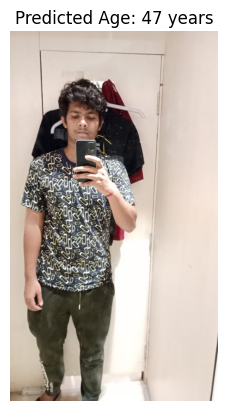

In [ ]:
import cv2
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained model
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/test.h5')  # Replace with the actual path

# Path to the test image
test_image_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/Jatin.jpg'  # Replace with the actual path

# Make predictions
img = load_img(test_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = loaded_model.predict(img_array)

# Extract age and gender predictions
predicted_age_normalized = predictions[0][0]
predicted_age_original = int(predicted_age_normalized * 100)  # Assuming the original age range is 0-100
#predicted_gender = 'Male' if predictions[1][0] > 0.5 else 'Female'

# Read the image using OpenCV
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Display the image along with predicted age and gender
plt.imshow(image)
plt.title(f'Predicted Age: {predicted_age_original} years')
plt.axis('off')
plt.show()


In [ ]:
display(df)

,image_path,age,gender
0,/content/UTKFace/24_1_3_20170119170559575.jpg....,24,1
1,/content/UTKFace/15_0_0_20170110232717464.jpg....,15,0
2,/content/UTKFace/26_0_0_20170117184723591.jpg....,26,0
3,/content/UTKFace/24_1_2_20170116174526687.jpg....,24,1
4,/content/UTKFace/60_0_3_20170119205112264.jpg....,60,0
...,...,...,...
23703,/content/UTKFace/20_1_4_20161223230050564.jpg....,20,1
23704,/content/UTKFace/35_0_1_20170117184758222.jpg....,35,0
23705,/content/UTKFace/20_1_0_20170104005910664.jpg....,20,1
23706,/content/UTKFace/84_1_0_20170120223843966.jpg....,84,1


from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

## Exploratory Data Anlysis

In [ ]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


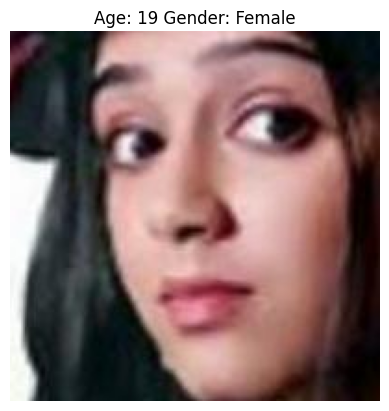

In [ ]:
rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

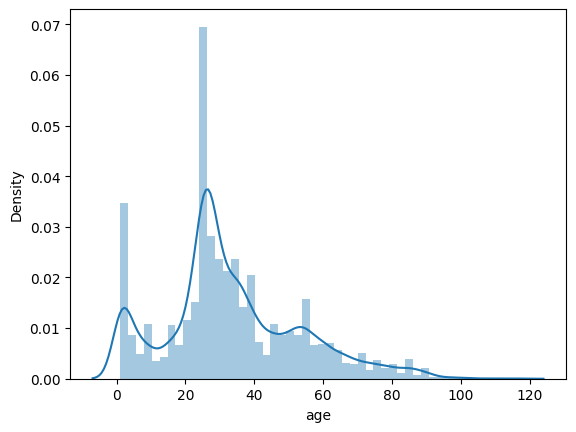

In [ ]:
 # Age distribution
 sns.distplot(df['age'])

The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 120 years. There are some outliers at the higher end of the distribution.

<Axes: xlabel='gender', ylabel='count'>

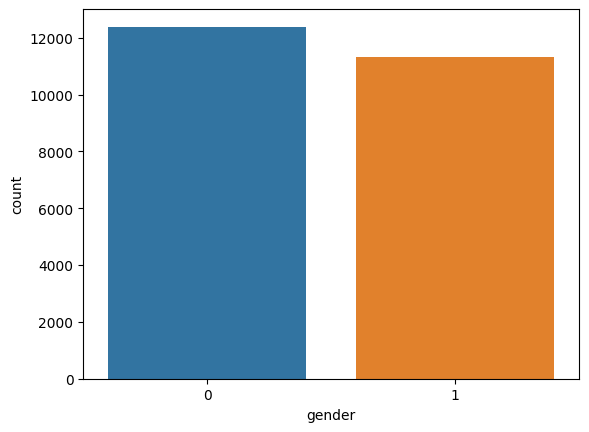

In [ ]:
sns.countplot(x = 'gender',data = df,palette='tab10')

The number of samples for males are slightly higher than that of females. However, the dataset is not highly imbalanced.

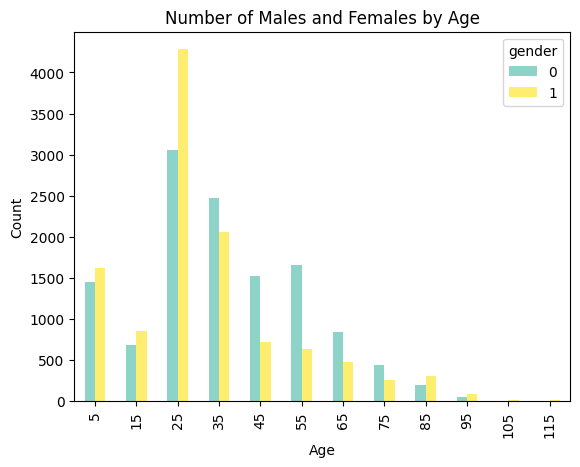

In [ ]:
df['age_group']=10*(df['age']//10)+5
pivot_data = df.groupby(['age_group', 'gender']).size().unstack()
pivot_data.plot(kind='bar', stacked=False, colormap='Set3')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Males and Females by Age')
plt.show()

Both genders have almost same number of samples as per age group.


In [ ]:
from tensorflow.keras.utils import load_img
plt.figure(figsize=(20, 20))
samples = df.iloc[0:9]

for index, sample, age, gender, age_group in samples.itertuples():
    plt.subplot(3, 3, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

## Feature Extraction

In [ ]:

def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
input_shape = (128, 128, 1)
X = extract_image_features(df['image_path'])
X = X / 255.0
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_age = y_age.reshape(-1, 1)
labels = {'gender_out': y_gender, 'age_out': y_age}


  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import numpy as np

# Define the input layer with the specified input shape
inputs = Input((input_shape))

# First convolutional layer with 16 filters and ReLU activation
conv_1 = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
conv_1 = BatchNormalization()(conv_1)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

# Second convolutional layer with 32 filters and ReLU activation
conv_2 = Conv2D(32, kernel_size=(3, 3), activation='relu')(max_1)
conv_2 = BatchNormalization()(conv_2)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

# Third convolutional layer with 128 filters and ReLU activation
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
conv_3 = BatchNormalization()(conv_3)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

# Fourth convolutional layer with 256 filters and ReLU activation
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
conv_4 = BatchNormalization()(conv_4)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

# Flatten layer to convert the 3D feature map to 1D
flatten = Flatten()(max_4)

# Two dense layers for age and gender prediction
dense_1 = Dense(1, activation='relu')(flatten)
dense_2 = Dense(1, activation='linear')(flatten)

# Apply dropout to prevent overfitting
dropout_1 = Dropout(0.2)(dense_1)
dropout_2 = Dropout(0.2)(dense_2)

# Output layers for gender and age prediction
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='linear', name='age_out')(dropout_2)

# Create the model with specified inputs and outputs
model = Model(inputs=[inputs], outputs=[output_1, output_2])

# Use Adam optimizer with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)

# Implement a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.9
    return lr

# Create a learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_scheduler)

# Create early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use data augmentation for gender and age datasets
datagen_gender = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen_age = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen_gender.fit(X)
datagen_age.fit(X)

# Compile the model with binary crossentropy for gender and mean squared error for age
model.compile(
    loss={'gender_out': 'binary_crossentropy', 'age_out': 'mse'},
    optimizer=optimizer,
    metrics=['accuracy'],
    loss_weights={'gender_out': 1.0, 'age_out': 0.5}  # Adjust the weights as needed
)

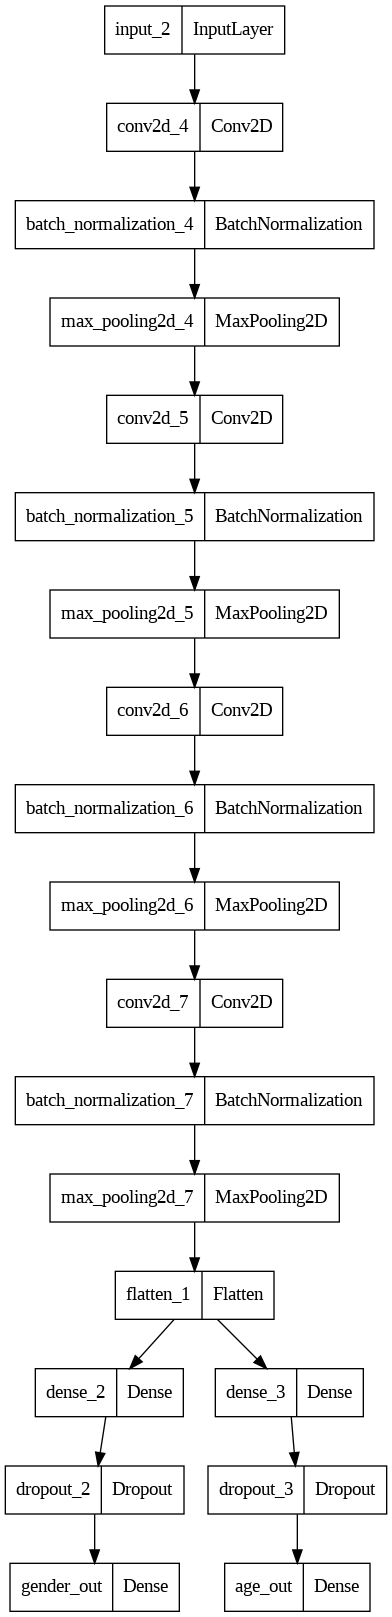

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
print(y_gender.shape)
print(X.shape)
print(y_age.shape)

(23708,)
(23708, 128, 128, 1)
(23708, 1)


In [ ]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=64, epochs=25, validation_split=0.2)

## Plot Results

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

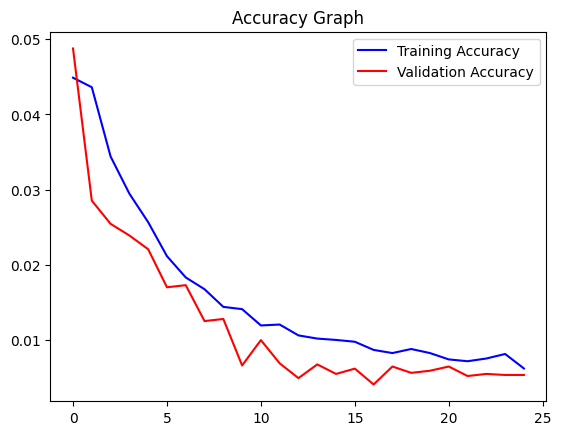

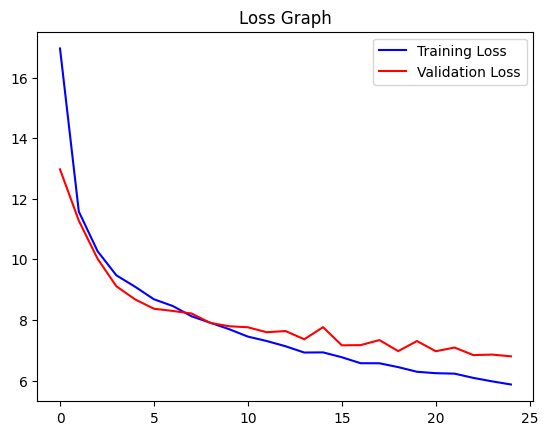

In [ ]:
# plot results for age
acc = history.history['age_out_accuracy']
val_acc = history.history['val_age_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Predicting Test Data

In [ ]:
model.save("age_gender_v2.1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model =load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/Models/age_gender.h5')

In [ ]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 21ms/step


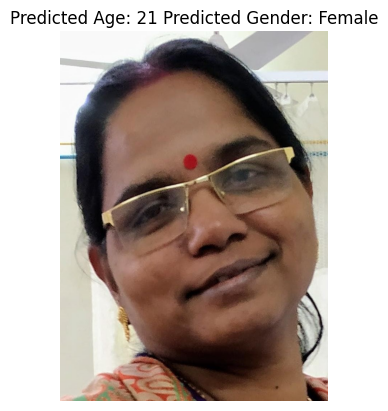

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img

img_to_test = '/content/drive/MyDrive/Colab Notebooks/Projects/Facial Identification/test/yash.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))